In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scienceplots

plt.style.use('science')

In [3]:
dataPath = 'data'
reportsPath = 'reports'

In [4]:
dataFiles_csv = [fileName for fileName in os.listdir(path=dataPath) if os.path.splitext(fileName)[1]=='.csv']

In [5]:
dataFiles_csv

['disciplina_chasy.csv',
 'discipliny.csv',
 'ist_status_student.csv',
 'ist_tip_fin_studenta.csv',
 'lichnost.csv',
 'propuski.csv',
 'status_group.csv',
 'students.csv',
 'students_tek.csv',
 'student_record_book.csv',
 'vid_zanyatiy.csv']

In [6]:
def make_report(fileName, dataPath, reportsPath):
    profile = ProfileReport(pd.read_csv(os.path.join(dataPath, fileName), sep="#", encoding='cp1251'), title=f"{fileName} Profiling Report")
    profile.to_file(os.path.join(reportsPath, f"{fileName}_report.html"))

In [7]:
for fileName in dataFiles_csv:
    if os.path.getsize(os.path.join(dataPath, fileName)) <= 10**9 and False:
        make_report(fileName, dataPath, reportsPath)

In [8]:
df = pd.read_csv(os.path.join(dataPath, 'student_record_book.csv'))

In [9]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893540 entries, 0 to 5893539
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   GRUPPA_GUID    object 
 1   LICHNOST_GUID  object 
 2   SEMESTR        int64  
 3   GOD_NABORA     int64  
 4   DISCIPLINA     object 
 5   BALL           float64
 6   OCENKA         object 
 7   SIMVOL         object 
 8   DATA_SDACHI    object 
 9   VID_ATT        object 
dtypes: float64(1), int64(2), object(7)
memory usage: 449.6+ MB


In [10]:
def truncate_string_year(text):
    return text[-4:len(text)]

In [11]:
df_bez_nan = df[~df['DATA_SDACHI'].isna()]

In [12]:
df_bez_nan['DATA_SDACHI_YEAR'] = df_bez_nan['DATA_SDACHI'].apply(truncate_string_year).apply(int)

C:\Users\Глеб\AppData\Local\Temp\ipykernel_280\2159950627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bez_nan['DATA_SDACHI_YEAR'] = df_bez_nan['DATA_SDACHI'].apply(truncate_string_year).apply(int)


In [13]:
df

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
0,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
1,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
2,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,10,2001,Преддипломная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
3,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
4,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
...,...,...,...,...,...,...,...,...,...,...
5893535,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,fd0df719-b92e-4bd9-b0ac-3b6cb62f9066,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,20.09.2023,Дифференцированный зачет
5893536,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,10,2022,Преддипломная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5893537,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,8,2022,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5893538,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,6,2022,Ознакомительная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет


In [14]:
df_ball_vbros= df[(df['BALL']>100) | (df['BALL']<0)]
df_ball_vbros

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
12169,62b8507c-4c00-4aab-89f6-1b2a176ee9a0,a795917f-5c43-412d-95ab-bb90019654b5,10,2005,Автоматизация проектирования,195.0,NaN,NaN,22.06.2012,Экзамен
17171,fe0471e0-b103-4c43-9a42-5b54ad1f9467,211f6aae-b091-4b39-819a-2f50b43864f6,9,2006,Промышленная экология,110.0,NaN,NaN,18.02.2013,Зачет
17188,fe0471e0-b103-4c43-9a42-5b54ad1f9467,211f6aae-b091-4b39-819a-2f50b43864f6,7,2006,Правоведение,150.0,NaN,NaN,20.01.2012,Зачет
29185,32ad3c55-effc-4988-aa3b-801d943c8935,68aa5012-4712-4d50-87e6-a62e2547dfce,9,2006,Химическая кинетика гетерогенных процессов в т...,360.0,NaN,NaN,12.01.2012,Зачет
29193,32ad3c55-effc-4988-aa3b-801d943c8935,bd781c50-f900-431a-920e-cbcc1537c951,9,2006,Химическая кинетика гетерогенных процессов в т...,260.0,NaN,NaN,11.01.2012,Зачет
...,...,...,...,...,...,...,...,...,...,...
5793590,2afb19bf-0ce2-4498-b7e6-f952371b587d,dce2378b-144a-4bda-9567-9687c2cf28d0,1,2023,Подготовка публикаций и (или) заявок на патент...,384.0,NaN,NaN,19.01.2024,Зачет
5793593,2afb19bf-0ce2-4498-b7e6-f952371b587d,d1b76313-01e1-4448-9ec3-1022fe551f53,1,2023,"Научная деятельность, направленная на подготов...",400.0,NaN,NaN,19.01.2024,Дифференцированный зачет
5793594,2afb19bf-0ce2-4498-b7e6-f952371b587d,d1b76313-01e1-4448-9ec3-1022fe551f53,1,2023,Подготовка публикаций и (или) заявок на патент...,400.0,NaN,NaN,19.01.2024,Зачет
5793743,eafbe5b6-68d4-49a2-b2b4-0b6ed2a2cfa6,880a336b-492b-4bd7-af83-d19f20da8e9e,1,2023,"Научная деятельность, направленная на подготов...",360.0,NaN,NaN,15.01.2024,Дифференцированный зачет


In [15]:
df_ball_vbros = df_ball_vbros[~df_ball_vbros['BALL'].isna()] 
df_ball_vbros['BALL'] = df_ball_vbros['BALL'].apply(int)

In [16]:
df_ball_vbros

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
12169,62b8507c-4c00-4aab-89f6-1b2a176ee9a0,a795917f-5c43-412d-95ab-bb90019654b5,10,2005,Автоматизация проектирования,195,NaN,NaN,22.06.2012,Экзамен
17171,fe0471e0-b103-4c43-9a42-5b54ad1f9467,211f6aae-b091-4b39-819a-2f50b43864f6,9,2006,Промышленная экология,110,NaN,NaN,18.02.2013,Зачет
17188,fe0471e0-b103-4c43-9a42-5b54ad1f9467,211f6aae-b091-4b39-819a-2f50b43864f6,7,2006,Правоведение,150,NaN,NaN,20.01.2012,Зачет
29185,32ad3c55-effc-4988-aa3b-801d943c8935,68aa5012-4712-4d50-87e6-a62e2547dfce,9,2006,Химическая кинетика гетерогенных процессов в т...,360,NaN,NaN,12.01.2012,Зачет
29193,32ad3c55-effc-4988-aa3b-801d943c8935,bd781c50-f900-431a-920e-cbcc1537c951,9,2006,Химическая кинетика гетерогенных процессов в т...,260,NaN,NaN,11.01.2012,Зачет
...,...,...,...,...,...,...,...,...,...,...
5793590,2afb19bf-0ce2-4498-b7e6-f952371b587d,dce2378b-144a-4bda-9567-9687c2cf28d0,1,2023,Подготовка публикаций и (или) заявок на патент...,384,NaN,NaN,19.01.2024,Зачет
5793593,2afb19bf-0ce2-4498-b7e6-f952371b587d,d1b76313-01e1-4448-9ec3-1022fe551f53,1,2023,"Научная деятельность, направленная на подготов...",400,NaN,NaN,19.01.2024,Дифференцированный зачет
5793594,2afb19bf-0ce2-4498-b7e6-f952371b587d,d1b76313-01e1-4448-9ec3-1022fe551f53,1,2023,Подготовка публикаций и (или) заявок на патент...,400,NaN,NaN,19.01.2024,Зачет
5793743,eafbe5b6-68d4-49a2-b2b4-0b6ed2a2cfa6,880a336b-492b-4bd7-af83-d19f20da8e9e,1,2023,"Научная деятельность, направленная на подготов...",360,NaN,NaN,15.01.2024,Дифференцированный зачет


In [27]:
df

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
0,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
1,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
2,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,10,2001,Преддипломная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
3,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
4,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
...,...,...,...,...,...,...,...,...,...,...
5893535,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,fd0df719-b92e-4bd9-b0ac-3b6cb62f9066,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,20.09.2023,Дифференцированный зачет
5893536,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,10,2022,Преддипломная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5893537,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,8,2022,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5893538,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,6,2022,Ознакомительная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет


c:\Users\Глеб\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BALL', ylabel='Count'>

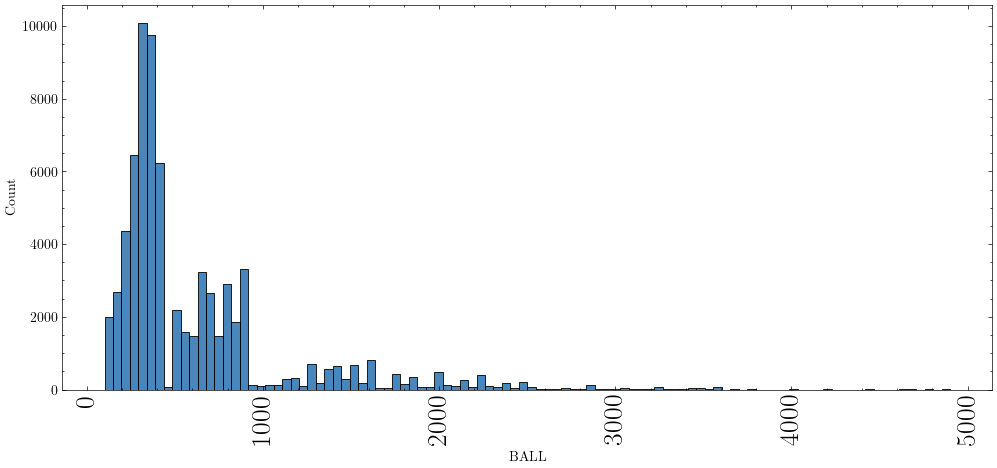

In [21]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90, size=20)
sns.histplot(data=df_ball_vbros,x='BALL',bins=100)

In [22]:
df

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
0,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
1,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
2,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,10,2001,Преддипломная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
3,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
4,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
...,...,...,...,...,...,...,...,...,...,...
5893535,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,fd0df719-b92e-4bd9-b0ac-3b6cb62f9066,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,20.09.2023,Дифференцированный зачет
5893536,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,10,2022,Преддипломная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5893537,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,8,2022,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5893538,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,6,2022,Ознакомительная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет


In [16]:
df_bez_nan = df_bez_nan[(df_bez_nan['DATA_SDACHI_YEAR'] > 2024) | (df_bez_nan['DATA_SDACHI_YEAR'] < 2002)]
df_bez_nan

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT,DATA_SDACHI_YEAR
227878,0d3e8c30-de29-4b82-a981-66b142d5080b,1c87c0bf-8753-4053-aecc-7e7c8f10343d,6,2009,Электромагнитные переходные процессы,60.0,NaN,NaN,13.03.3012,Курсовая работа,3012
379424,7bb73367-ab74-4201-964e-1fa08b178624,0a01a8a8-513b-46fc-87fa-1cc732a3d1c2,5,2010,Учение о геохимии и геохимических циклах,60.0,Удовлетворительно,C,19.01.2035,Курсовая работа,2035
389699,08e57ada-be90-49d6-a4ac-9478789c33d4,53982608-f983-45cc-9b2e-24f781b83bae,2,2013,Начертательная геометрия. Инженерная и компьют...,66.0,Удовлетворительно,C+,22.01.9201,Дифференцированный зачет,9201
713143,fba9f8be-a525-4137-9ed0-613bad1be7d9,688a5bb5-f5cb-4e38-9488-1ef4fde3683a,5,2013,Электрические машины,60.0,Удовлетворительно,C,01.06.3201,Экзамен,3201
732868,caa85213-392b-40cd-a614-9e77735bf173,53982608-f983-45cc-9b2e-24f781b83bae,2,2013,Начертательная геометрия. Инженерная и компьют...,66.0,Удовлетворительно,C+,22.01.9201,Дифференцированный зачет,9201
...,...,...,...,...,...,...,...,...,...,...,...
5565812,89f9387b-ec8b-4cc4-a775-3eb353b222e2,3fdb8a04-d6ed-4865-a8bb-b4b4006602fb,1,2016,Иностранный язык (английский),60.0,Зачет,D,02.02.2027,Зачет,2027
5579453,89f9387b-ec8b-4cc4-a775-3eb353b222e2,4467ca06-a17e-43ab-8f0e-d032e30c7236,1,2016,Иностранный язык (английский),55.0,Зачет,D,02.02.2027,Зачет,2027
5584086,89f9387b-ec8b-4cc4-a775-3eb353b222e2,b6c36893-7649-4810-a410-59aa9411822d,1,2016,Иностранный язык (английский),55.0,Зачет,D,02.02.2027,Зачет,2027
5641083,0e69a6f4-a238-414b-8712-97d6c5bf00d3,cf1b8fe6-2733-4a83-b056-a55505d33ae1,3,2017,Философия,80.0,Зачет,D,04.02.2201,Зачет,2201


In [19]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90, size=20)
sns.countplot(data=df_bez_nan,x='DATA_SDACHI_YEAR')

<Axes: xlabel='DATA_SDACHI_YEAR', ylabel='count'>

DATA_SDACHI_YEAR
False    5809515
True       84025
Name: count, dtype: int64

<Axes: xlabel='DATA_SDACHI_YEAR', ylabel='count'>

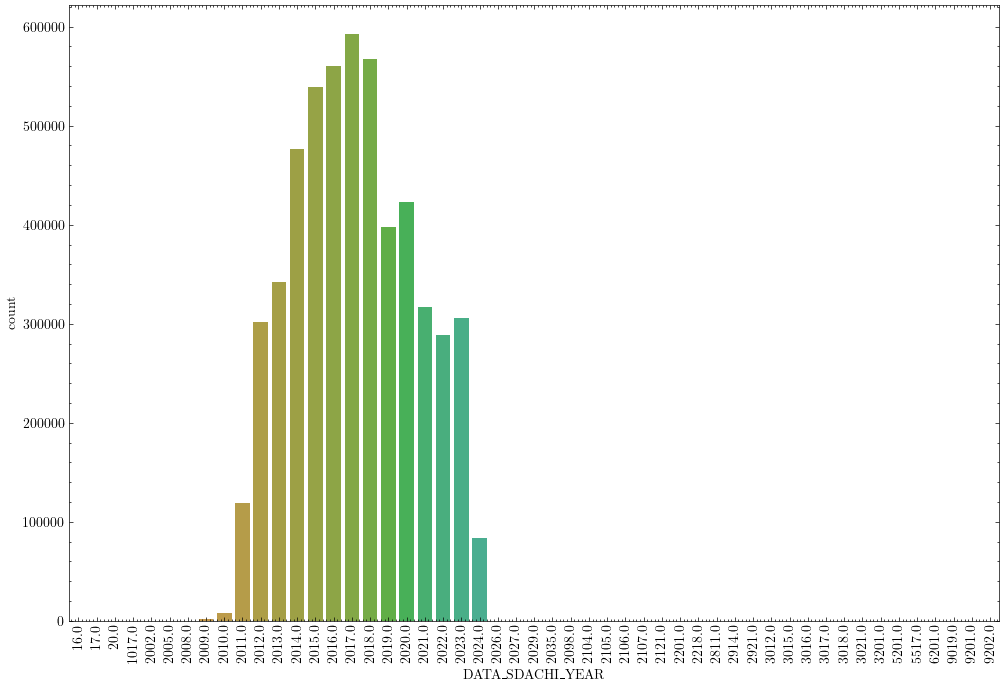

In [161]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(data=df, x='DATA_SDACHI_YEAR')

In [9]:
df.shape

(5893540, 10)

In [58]:
df['SIMVOL_WITHOUT_BALL']= ((df['BALL'].isna())&(df['SIMVOL']))
df['SIMVOL_AND_BALL'] = ~(df['BALL'].isna()) & ~(df['SIMVOL'].isna()) 
df['NOT_SIMVOL_AND_NOT_BALL'] = (df['BALL'].isna()) & (df['SIMVOL'].isna()) 
df

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT,SIMVOL_WITHOUT_BALL,SIMVOL_AND_BALL,NOT_SIMVOL_AND_NOT_BALL
0,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False,False,True
1,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False,False,True
2,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,10,2001,Преддипломная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False,False,True
3,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False,False,True
4,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893535,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,fd0df719-b92e-4bd9-b0ac-3b6cb62f9066,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,20.09.2023,Дифференцированный зачет,True,False,False
5893536,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,10,2022,Преддипломная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет,True,False,False
5893537,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,8,2022,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет,True,False,False
5893538,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,6,2022,Ознакомительная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет,True,False,False


In [95]:
df['DATA_SDACHI'] = pd.to_datetime(df['DATA_SDACHI'], errors='coerce')

C:\Users\Глеб\AppData\Local\Temp\ipykernel_5672\760365518.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATA_SDACHI'] = pd.to_datetime(df['DATA_SDACHI'], errors='coerce')


In [101]:
df['DATA_SDACHI'].iloc[5893535].year

2023

In [111]:
selected_data = df[((df['SIMVOL_WITHOUT_BALL'] == True) | (df['SIMVOL_AND_BALL'] == True)) &(df['DATA_SDACHI'].dt.year > 2010) &(df['DATA_SDACHI'].dt.year  <2024) & (~df['DATA_SDACHI'].isna())]

# Добавляем столбец 'Category'
selected_data['Category'] = 'SIMVOL_WITHOUT_BALL'
selected_data.loc[selected_data['SIMVOL_AND_BALL'], 'Category'] = 'SIMVOL_AND_BALL'
selected_data.loc[selected_data['NOT_SIMVOL_AND_NOT_BALL'], 'Category'] = 'NOT_SIMVOL_AND_NOT_BALL'
selected_data

C:\Users\Глеб\AppData\Local\Temp\ipykernel_5672\2400555889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Category'] = 'SIMVOL_WITHOUT_BALL'


,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT,SIMVOL_WITHOUT_BALL,SIMVOL_AND_BALL,NOT_SIMVOL_AND_NOT_BALL,Category
336,0da9fb65-3d5f-470e-8cac-056143898178,b2d7dfb3-a634-4c52-b523-a9ebbe5748b0,3,2010,Микропроцессорные системы управления и контроля,90.0,Отлично,A,2012-01-13,Экзамен,False,True,False,SIMVOL_AND_BALL
337,0da9fb65-3d5f-470e-8cac-056143898178,b2d7dfb3-a634-4c52-b523-a9ebbe5748b0,3,2010,Научно-исследовательская работа в семестре,55.0,Зачет,D,2011-12-29,Зачет,False,True,False,SIMVOL_AND_BALL
338,0da9fb65-3d5f-470e-8cac-056143898178,b2d7dfb3-a634-4c52-b523-a9ebbe5748b0,3,2010,Педагогическая практика,65.0,Удовлетворительно,C+,2011-12-30,Дифференцированный зачет,False,True,False,SIMVOL_AND_BALL
339,0da9fb65-3d5f-470e-8cac-056143898178,b2d7dfb3-a634-4c52-b523-a9ebbe5748b0,3,2010,Автоматизированное проектирование электронных ...,89.0,Хорошо,B+,2011-12-27,Экзамен,False,True,False,SIMVOL_AND_BALL
340,0da9fb65-3d5f-470e-8cac-056143898178,b2d7dfb3-a634-4c52-b523-a9ebbe5748b0,3,2010,Электронные промышленные устройства,90.0,Отлично,A,2012-01-09,Экзамен,False,True,False,SIMVOL_AND_BALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893190,44d27d46-6d4c-4d6f-98cc-6e3cbf2bd3fd,ac43c713-037e-4fb7-92d8-2a6486883bcc,2,2023,Ознакомительная практика,NaN,Неудовлетворительно,F,2023-09-14,Дифференцированный зачет,True,False,False,SIMVOL_WITHOUT_BALL
5893523,31eca58d-2a5a-4f0f-8074-54115d60b1f2,4a5de46a-b48c-4ad7-a1d4-86339b4f6e92,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,2023-09-20,Дифференцированный зачет,True,False,False,SIMVOL_WITHOUT_BALL
5893527,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,4777ee74-5405-4d25-bdc5-16e26452c8cc,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,2023-09-20,Дифференцированный зачет,True,False,False,SIMVOL_WITHOUT_BALL
5893531,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,cc7a8939-6e4c-45f7-a36f-0acbcb1c47ce,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,2023-09-20,Дифференцированный зачет,True,False,False,SIMVOL_WITHOUT_BALL


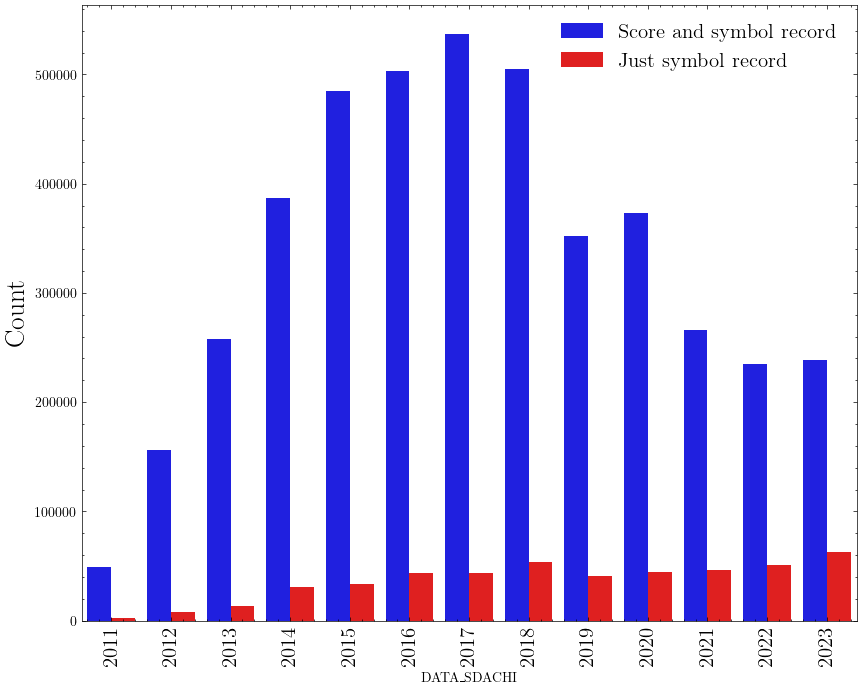

In [112]:
# Устанавливаем размер графика
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
# Строим countplot
sns.countplot(data=selected_data, x=selected_data['DATA_SDACHI'].dt.year, hue='Category',palette={'SIMVOL_WITHOUT_BALL': 'red', 'SIMVOL_AND_BALL': 'blue'})
plt.legend(['Score and symbol record','Just symbol record'],fontsize=15)
# Устанавливаем метку для оси y
plt.ylabel('Count', fontsize=20)

# Устанавливаем размер шрифта для меток на оси x
plt.xticks(size=15)

# Показываем график
plt.show()

<Axes: xlabel='GOD_NABORA', ylabel='count'>

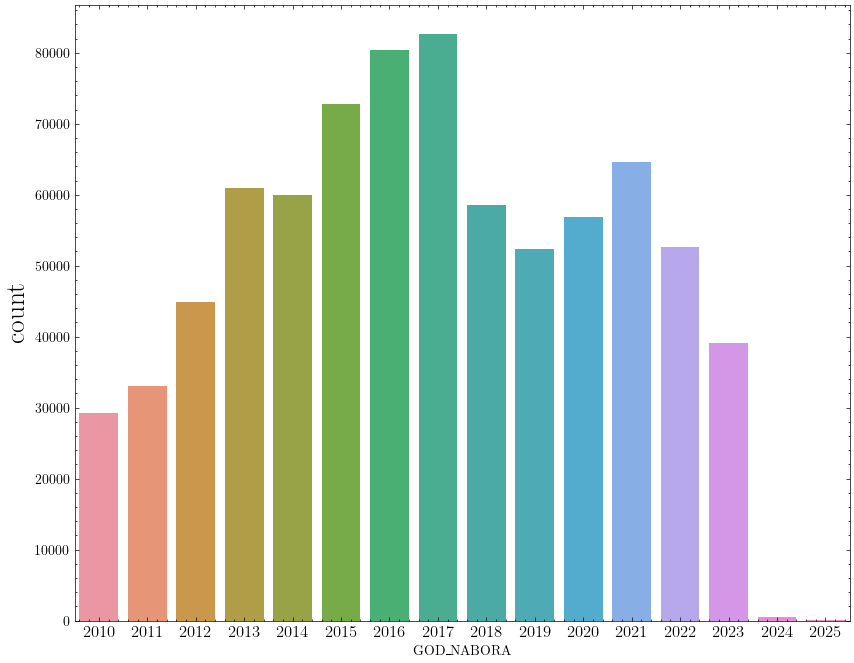

In [46]:
plt.figure(figsize=(10,8))
plt.ylabel(fontsize=20, ylabel='Count')
#plt.xticks(rotation=90)
plt.xticks(size=12)
sns.countplot(data=df[df['SIMVOL_WITHOUT_BALL']==True],x='GOD_NABORA')


In [25]:
df

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT,SIMVOL_WITHOUT_BALL
0,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False
1,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False
2,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,10,2001,Преддипломная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False
3,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False
4,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет,False
...,...,...,...,...,...,...,...,...,...,...,...
5893535,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,fd0df719-b92e-4bd9-b0ac-3b6cb62f9066,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,20.09.2023,Дифференцированный зачет,True
5893536,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,10,2022,Преддипломная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет,True
5893537,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,8,2022,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет,True
5893538,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,6,2022,Ознакомительная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет,True


In [23]:
df

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
0,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
1,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
2,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,ecf94fdb-1185-4a39-8673-6d7ef5aa498f,10,2001,Преддипломная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
3,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,4,2001,Ознакомительная учебная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
4,93cb9eb1-39d9-40d5-9f56-431d9e4982ce,6e078adb-a2a0-4be3-8b4d-83977c340306,6,2001,Технологическая производственная практика,NaN,NaN,NaN,NaN,Дифференцированный зачет
...,...,...,...,...,...,...,...,...,...,...
5893535,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,fd0df719-b92e-4bd9-b0ac-3b6cb62f9066,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,20.09.2023,Дифференцированный зачет
5893536,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,10,2022,Преддипломная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5893537,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,8,2022,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5893538,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,6,2022,Ознакомительная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет


In [10]:
df[(df.isna().any(axis=1)) & (df['SIMVOL']=='A')].tail(20)

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
5876646,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,f6662b1d-381e-411a-9bf6-96ed3cbdd61a,4,2018,Преддипломная практика,95.0,Отлично,A,NaN,Дифференцированный зачет
5876649,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,6fd99d9f-2b10-4ddf-9cf3-ec882acf56f0,4,2018,Преддипломная практика,99.0,Отлично,A,NaN,Дифференцированный зачет
5876650,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,6fd99d9f-2b10-4ddf-9cf3-ec882acf56f0,4,2018,Научно-производственная практика,99.0,Отлично,A,NaN,Дифференцированный зачет
5876652,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,7a20aff9-2658-45c6-a033-6b9ece6cb147,4,2018,Преддипломная практика,91.0,Отлично,A,NaN,Дифференцированный зачет
5876653,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,7a20aff9-2658-45c6-a033-6b9ece6cb147,4,2018,Научно-производственная практика,97.0,Отлично,A,NaN,Дифференцированный зачет
5876655,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,309d3b0f-3cc9-416e-baf4-6de2d825a370,4,2018,Преддипломная практика,95.0,Отлично,A,NaN,Дифференцированный зачет
5876656,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,309d3b0f-3cc9-416e-baf4-6de2d825a370,4,2018,Научно-производственная практика,98.0,Отлично,A,NaN,Дифференцированный зачет
5876667,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,5cdb4baa-7fea-4b23-b6bc-0ccb18a32aa9,4,2018,Преддипломная практика,91.0,Отлично,A,NaN,Дифференцированный зачет
5876668,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,5cdb4baa-7fea-4b23-b6bc-0ccb18a32aa9,4,2018,Научно-производственная практика,92.0,Отлично,A,NaN,Дифференцированный зачет
5876670,d4640dcc-9ab3-4da8-a07b-fc2d2c6c7701,f899e8fc-62be-4c77-ad8b-1fbb72680078,4,2018,Преддипломная практика,93.0,Отлично,A,NaN,Дифференцированный зачет


c:\Users\Глеб\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


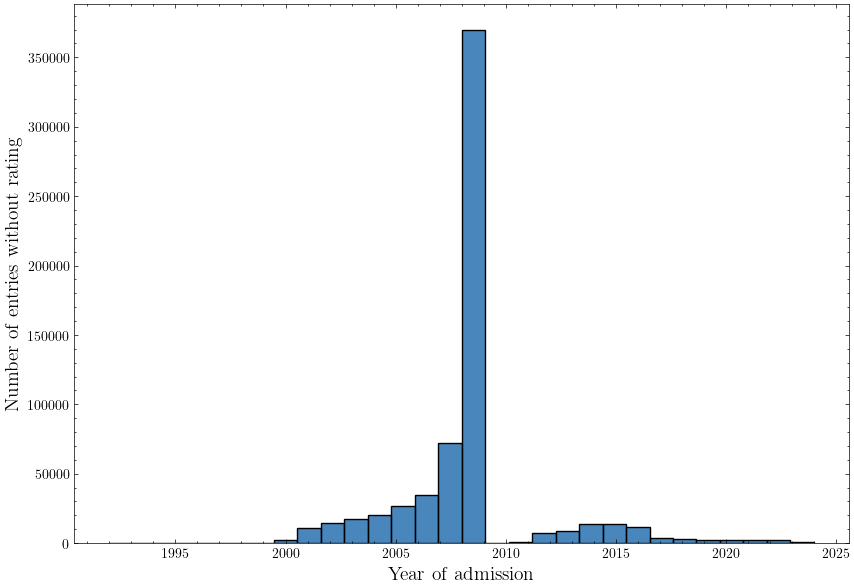

In [11]:
plt.figure(figsize=(10,7))
sns.histplot((df[df['OCENKA'].isna()]['GOD_NABORA']), bins=30)
plt.xlabel('Year of admission', fontsize=14)
plt.ylabel('Number of entries without rating', fontsize=14)
plt.show()

In [12]:
df[(df['OCENKA'].isna()) & (df['GOD_NABORA'] == 2010)].shape[0] / df[(df['GOD_NABORA'] == 2010)].shape[0] 

0.00037472558812020403

In [13]:
df[(df['GOD_NABORA'] == 2009)].shape[0] / df[(df['OCENKA'].isna()) & (df['GOD_NABORA'] == 2009)].shape[0]

1.0

In [14]:
count_miss_ocenka_by_god_nabora = df[df['OCENKA'].isna()].groupby('GOD_NABORA').count()['LICHNOST_GUID']

In [15]:
count_samples_by_god_nabora = df.groupby('GOD_NABORA')['LICHNOST_GUID'].count()

In [16]:
percentage_of_entries_without_evaluation_by_god_nabora = count_miss_ocenka_by_god_nabora / count_samples_by_god_nabora

In [17]:
percentage_of_entries_without_evaluation_by_god_nabora = percentage_of_entries_without_evaluation_by_god_nabora.reset_index()

In [18]:
percentage_of_entries_without_evaluation_by_god_nabora.rename(columns={'LICHNOST_GUID':'percentage_of_entries_without_evaluation'}, inplace=True)

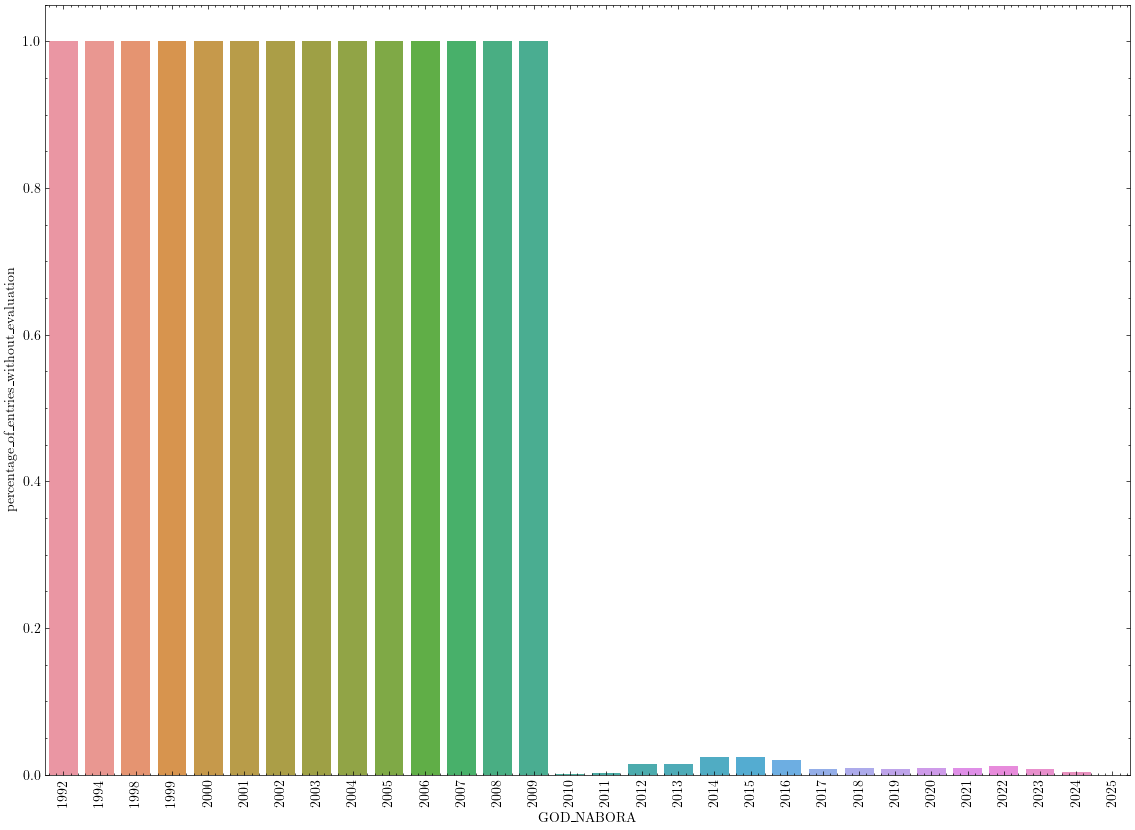

In [20]:
plt.figure(figsize=(14,10))
sns.barplot(data=percentage_of_entries_without_evaluation_by_god_nabora, x='GOD_NABORA', y='percentage_of_entries_without_evaluation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
n_subject_by_god = df.groupby('GOD_NABORA')['DISCIPLINA'].nunique().reset_index().rename(columns={'DISCIPLINA':'n_subj'})

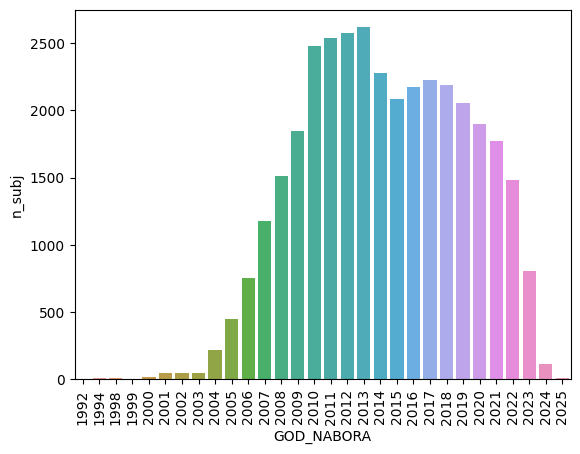

In [ ]:
sns.barplot(data=n_subject_by_god, x='GOD_NABORA', y='n_subj')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df[(df['GOD_NABORA'] == 2025)]

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
2148754,90ee2ee0-786f-4309-a138-ba6492e2db84,63d0eb11-1020-4f16-a5be-bc6d96aafdd1,2,2025,Практика по получению первичных профессиональн...,0.0,Неудовлетворительно,F,24.09.2022,Дифференцированный зачет
2148755,90ee2ee0-786f-4309-a138-ba6492e2db84,63d0eb11-1020-4f16-a5be-bc6d96aafdd1,4,2025,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
2148756,90ee2ee0-786f-4309-a138-ba6492e2db84,63d0eb11-1020-4f16-a5be-bc6d96aafdd1,4,2025,Преддипломная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
4377159,a8025b3e-408d-415e-b789-42d5762fedfc,d64820b2-006c-4aa8-a3cd-cdc78e5a4707,4,2025,Преддипломная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
4377160,a8025b3e-408d-415e-b789-42d5762fedfc,d64820b2-006c-4aa8-a3cd-cdc78e5a4707,4,2025,Научно-производственная практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
4377161,a8025b3e-408d-415e-b789-42d5762fedfc,d64820b2-006c-4aa8-a3cd-cdc78e5a4707,2,2025,Научно-исследовательская практика,NaN,Неудовлетворительно,F,NaN,Дифференцированный зачет
5880032,81f878ce-3d2d-42e7-ae5d-1e0d7835d30a,88d6f52c-9b32-4afe-a1c3-d5d646bd2419,6,2025,"Научная деятельность, направленная на подготов...",NaN,Незачет,F,NaN,Зачет
5880033,81f878ce-3d2d-42e7-ae5d-1e0d7835d30a,88d6f52c-9b32-4afe-a1c3-d5d646bd2419,4,2025,"Научная деятельность, направленная на подготов...",NaN,Незачет,F,NaN,Зачет
5880034,81f878ce-3d2d-42e7-ae5d-1e0d7835d30a,88d6f52c-9b32-4afe-a1c3-d5d646bd2419,2,2025,"Научная деятельность, направленная на подготов...",NaN,Незачет,F,NaN,Зачет


In [ ]:
df[(df['GOD_NABORA'] <= 2002)]['DISCIPLINA'].nunique()

51

In [ ]:
df['DATA_SDACHI'] = pd.to_datetime(df['DATA_SDACHI'], dayfirst=True, errors='coerce')

In [ ]:
df['LICHNOST_GUID'].nunique()

92602

In [ ]:
grouped_df = df.groupby('LICHNOST_GUID')

In [ ]:
df_tek_v = pd.read_csv(os.path.join(dataPath,'O_STUDENTS_TEK_V_202402091844.csv'), sep="#", encoding='cp1251')

In [ ]:
df_tek_v

,GRUPPA_GUID,LICHNOST_GUID,PODRAZDELENIE_ID,Школа,KAFEDRA_ID,Отделение,ID,Уровень образования,FORMA_OBUCHENIYA_ID,Форма обучения,Код направления подготовки,Направление подготовки,Курс обучения,TIP_FINANSIROVANIYA_ID,Форма финансирования,Дата начала обучения,статус студента
0,6b40e691-c865-437d-88ec-a1d69cbb418c,e6422122-bb18-41ee-ba07-dba503b96203,349,ЮТИ ТПУ,8376,Отделение промышленных технологий,2,Дипломированный специалист,2,Очно-заочная,151001,Технология машиностроения,NaN,3,на основе бюджетного финансирования,2008-09-21 00:00:00.000,учащийся
1,1815c95a-6162-4279-a589-b018d7e53ba8,e6422122-bb18-41ee-ba07-dba503b96203,349,ЮТИ ТПУ,8375,Отделение цифровых технологий,2,Дипломированный специалист,2,Очно-заочная,080502,Экономика и управление на предприятии (в машин...,NaN,3,на основе бюджетного финансирования,2008-09-20 00:00:00.000,учащийся
2,5d544bb6-3f4e-4583-84ce-caf40effec0b,05388c66-bbe8-4bbb-8b92-aeb75c42f865,7863,ИЯТШ,7865,Отделение экспериментальной физики,1,Бакалавр,1,Очная,03.03.02,Физика,4.0,2,на договорной основе,2022-09-01 00:00:00.000,учащийся
3,8f11a3a6-7263-49fc-8a08-a61c7356b6a2,a111e25b-ed98-4bd0-90a9-64d2a6402715,7863,ИЯТШ,7865,Отделение экспериментальной физики,1,Бакалавр,1,Очная,03.03.02,Физика,4.0,2,на договорной основе,2022-09-01 00:00:00.000,учащийся
4,35bf25f0-a02c-4b7b-998a-db42f08579b9,886a9eda-3da3-46eb-bdab-2e00cd98fea4,7863,ИЯТШ,7865,Отделение экспериментальной физики,1,Бакалавр,1,Очная,03.03.02,Физика,4.0,2,на договорной основе,2022-09-01 00:00:00.000,учащийся
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14490,94185946-5e82-49d2-a250-b315bd951e1c,6a7394e0-ab68-43bf-b6fd-b065a50242c6,9168,УН,8029,Отделение иностранных языков,5,Аспирант,1,Очная,5.9.,Филология,2.0,3,на основе бюджетного финансирования,2022-09-01 00:00:00.000,учащийся
14491,7472af7c-a753-4092-8b15-0df8c67c31fd,8f5c2ecc-7d59-4e34-8ac2-7377a2c7ea60,9168,УН,8030,Отделение русского языка,5,Аспирант,1,Очная,5.9.,Филология,1.0,3,на основе бюджетного финансирования,2023-09-01 00:00:00.000,учащийся
14492,7472af7c-a753-4092-8b15-0df8c67c31fd,e218c1d3-d795-4d1f-b00b-6ba4bd5bd762,9168,УН,8030,Отделение русского языка,5,Аспирант,1,Очная,5.9.,Филология,1.0,3,на основе бюджетного финансирования,2023-09-01 00:00:00.000,учащийся
14493,0eab1783-041d-4d37-856d-35851ebbaf8a,fb5098c3-0750-44a2-bae0-3d5658854a0d,9168,УН,8029,Отделение иностранных языков,5,Аспирант,1,Очная,5.9.,Филология,1.0,3,на основе бюджетного финансирования,2023-09-01 00:00:00.000,учащийся


In [ ]:
df_tek_v[df_tek_v['LICHNOST_GUID'] == 'e6422122-bb18-41ee-ba07-dba503b96203']

,GRUPPA_GUID,LICHNOST_GUID,PODRAZDELENIE_ID,Школа,KAFEDRA_ID,Отделение,ID,Уровень образования,FORMA_OBUCHENIYA_ID,Форма обучения,Код направления подготовки,Направление подготовки,Курс обучения,TIP_FINANSIROVANIYA_ID,Форма финансирования,Дата начала обучения,статус студента
0,6b40e691-c865-437d-88ec-a1d69cbb418c,e6422122-bb18-41ee-ba07-dba503b96203,349,ЮТИ ТПУ,8376,Отделение промышленных технологий,2,Дипломированный специалист,2,Очно-заочная,151001,Технология машиностроения,NaN,3,на основе бюджетного финансирования,2008-09-21 00:00:00.000,учащийся
1,1815c95a-6162-4279-a589-b018d7e53ba8,e6422122-bb18-41ee-ba07-dba503b96203,349,ЮТИ ТПУ,8375,Отделение цифровых технологий,2,Дипломированный специалист,2,Очно-заочная,080502,Экономика и управление на предприятии (в машин...,NaN,3,на основе бюджетного финансирования,2008-09-20 00:00:00.000,учащийся


In [ ]:
df_tek_v['Дата начала обучения'] = pd.to_datetime(df_tek_v['Дата начала обучения'])

<Axes: xlabel='Дата начала обучения', ylabel='Count'>

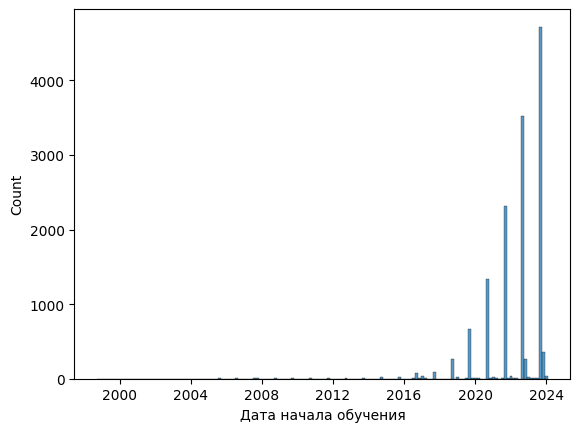

In [ ]:
sns.histplot(data=df_tek_v[(df_tek_v['статус студента']=='учащийся')], x='Дата начала обучения')

In [ ]:
df1000row = df.iloc[-1000:]

In [ ]:
df1000row

,GRUPPA_GUID,LICHNOST_GUID,SEMESTR,GOD_NABORA,DISCIPLINA,BALL,OCENKA,SIMVOL,DATA_SDACHI,VID_ATT
5892540,1ec27e10-e2ac-4417-ab15-8efdfcf632b0,af66a6bc-4dc8-4876-bb65-7d88c96147a0,10,2023,Научно-исследовательская работа,NaN,Неудовлетворительно,F,NaT,Дифференцированный зачет
5892541,1ec27e10-e2ac-4417-ab15-8efdfcf632b0,af66a6bc-4dc8-4876-bb65-7d88c96147a0,8,2023,Эксплуатационная практика,NaN,Неудовлетворительно,F,NaT,Дифференцированный зачет
5892542,1ec27e10-e2ac-4417-ab15-8efdfcf632b0,af66a6bc-4dc8-4876-bb65-7d88c96147a0,6,2023,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaT,Дифференцированный зачет
5892543,1ec27e10-e2ac-4417-ab15-8efdfcf632b0,af66a6bc-4dc8-4876-bb65-7d88c96147a0,4,2023,Научно-исследовательская работа (получение пер...,NaN,Неудовлетворительно,F,NaT,Дифференцированный зачет
5892544,1ec27e10-e2ac-4417-ab15-8efdfcf632b0,af66a6bc-4dc8-4876-bb65-7d88c96147a0,2,2023,Ознакомительная практика,NaN,Неудовлетворительно,F,NaT,Дифференцированный зачет
...,...,...,...,...,...,...,...,...,...,...
5893535,cedf86e0-5fe8-4cfd-a0ef-37711a0c921d,fd0df719-b92e-4bd9-b0ac-3b6cb62f9066,2,2022,Учебная практика по развитию цифровых компетенций,NaN,Неудовлетворительно,F,2023-09-20,Дифференцированный зачет
5893536,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,10,2022,Преддипломная практика,NaN,Неудовлетворительно,F,NaT,Дифференцированный зачет
5893537,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,8,2022,Технологическая (проектно-технологическая) пра...,NaN,Неудовлетворительно,F,NaT,Дифференцированный зачет
5893538,a759484f-a6d7-40a7-ac62-ed96077fda69,f19a9675-7cc2-4a62-8803-83bcc7ec36af,6,2022,Ознакомительная практика,NaN,Неудовлетворительно,F,NaT,Дифференцированный зачет


In [ ]:
grouped_array = df.dropna().groupby(['LICHNOST_GUID', 'SEMESTR']).apply(lambda x: (x[['DISCIPLINA', 'SIMVOL', 'DATA_SDACHI']])).droplevel(level=2)
grouped_array

KeyboardInterrupt: 

In [ ]:
grouped_array

DISCIPLINA  \
LICHNOST_GUID                        SEMESTR                                                      
0109f760-ca6e-41f9-bb6d-a70f9713cf4e 2        Учебная практика по развитию цифровых компетенций   
                                     4        Практика по получению первичных профессиональн...   
                                     6        Практика по получению профессиональных умений ...   
                                     8                                   Преддипломная практика   
029ec607-da70-4537-acc2-20d581fca3cc 2                                 Ознакомительная практика   
...                                                                                         ...   
fbcaf5a7-a8fa-44b3-a9f3-8a808640d90f 4                                 Технологическая практика   
fd0df719-b92e-4bd9-b0ac-3b6cb62f9066 2        Учебная практика по развитию цифровых компетенций   
                                     4                                 Ознакомительная практика   
                                     6        Технологическая (проектно-технологическая) пра...   
                                     8                                   Преддипломная практика   

                                             SIMVOL DATA_SDACHI  
LICHNOST_GUID                        SEMESTR                     
0109f760-ca6e-41f9-bb6d-a70f9713cf4e 2            F         NaT  
                                     4            F         NaT  
                                     6            F         NaT  
                                     8            F         NaT  
029ec607-da70-4537-acc2-20d581fca3cc 2            F         NaT  
...                                             ...         ...  
fbcaf5a7-a8fa-44b3-a9f3-8a808640d90f 4            F         NaT  
fd0df719-b92e-4bd9-b0ac-3b6cb62f9066 2            F  2023-09-20  
                                     4            F         NaT  
                                     6            F         NaT  
                                     8            F         NaT  

[1000 rows x 3 columns]

In [ ]:
pd.DataFrame(grouped_array)

0
LICHNOST_GUID                        SEMESTR                                                   
00010b8e-0ec9-4368-b027-05a10b025e98 1        [[Начертательная геометрия и инженерная график...
                                     2        [[Физика 1, C+, 2017-04-26 00:00:00], [Математ...
                                     3        [[Физическая культура и спорт, D, 2019-04-17 0...
                                     4        [[Учебная практика, C, NaT], [Математический а...
                                     5        [[Метрология, стандартизация и сертификация, D...
...                                                                                         ...
ffffcfd8-faed-4bb0-8e5d-4f2f575a9ef3 4        [[Научно-исследовательская работа в семестре, ...
fffffaf5-ab8b-4b69-932c-3e33a54c7b4c 1        [[Технологические установки объектов нефтегазо...
                                     2        [[Практика по получению первичных профессионал...
                                     3        [[Промышленная информационная безопасность, B,...
                                     4        [[Практика по получению профессиональных умени...

[498177 rows x 1 columns]

In [ ]:
dfs = []
for fileName in dataFiles_csv:
    dfs.append(pd.read_csv(os.path.join(dataPath, fileName), sep="#", encoding='cp1251'))
    print(fileName, dfs[-1].columns)

O_IST_STATUS_GRUPPY_V_202402151834.csv Index(['GRUPPA_GUID', 'LICHNOST_GUID', 'DATA_NACHALA',
       'TIP_OSNOVANIYA_VVODA_ID', 'PRICHINA_VVODA_ZAPISI',
       'TIP_PARAGRAFA_PRIKAZA_ID', 'OSNOVANIE_VVODA'],
      dtype='object')
O_IST_STATUS_STUDENTA_V_202402151835.csv Index(['GRUPPA_GUID', 'LICHNOST_GUID', 'DATA_NACHALA', 'STATUS_STUDENTA_ID',
       'STATUS', 'TIP_OSNOVANIYA_VVODA_ID', 'PRICHINA_VVODA_ZAPISI',
       'PRICHINA_OTCHISLENIYA_ID', 'PRICHINA_OTCHISLENIYA', 'VID_OTPUSKA_ID',
       'VID_OTPUSKA', 'TIP_PARAGRAFA_PRIKAZA_ID', 'OSNOVANIE_VVODA',
       'KATEGORIYA_OBUCHAEMOGO_ID', 'KATEGORIYA_OBUCHAEMOGO'],
      dtype='object')
O_IST_TIP_FIN_STUDENTA_V_202402151836.csv Index(['GRUPPA_GUID', 'LICHNOST_GUID', 'DATA_NACHALA',
       'TIP_FINANSIROVANIYA_ID', 'TIP_FINANSIROVANIYA',
       'TIP_OSNOVANIYA_VVODA_ID', 'PRICHINA_VVODA_ZAPISI',
       'TIP_PARAGRAFA_PRIKAZA_ID', 'OSNOVANIE_VVODA'],
      dtype='object')
O_LICHNOST_V_202402091841.csv Index(['GUID', 'GOD_ROZHDENIYA',

In [ ]:
IST_STATUS_STUDENTA = dfs[1]
IST_STATUS_STUDENTA

,GRUPPA_GUID,LICHNOST_GUID,DATA_NACHALA,STATUS_STUDENTA_ID,STATUS,TIP_OSNOVANIYA_VVODA_ID,PRICHINA_VVODA_ZAPISI,PRICHINA_OTCHISLENIYA_ID,PRICHINA_OTCHISLENIYA,VID_OTPUSKA_ID,VID_OTPUSKA,TIP_PARAGRAFA_PRIKAZA_ID,OSNOVANIE_VVODA,KATEGORIYA_OBUCHAEMOGO_ID,KATEGORIYA_OBUCHAEMOGO
0,bf266059-5d14-4f01-be4f-890fec36424f,fa5af205-36d1-4562-a485-68ac1ff27ac2,2006-11-01 00:00:00.000,15,отчисленный,2,приказ,1.0,акад.задолженность,NaN,NaN,7.0,Отчислить,1.0,студент
1,bf266059-5d14-4f01-be4f-890fec36424f,fa5af205-36d1-4562-a485-68ac1ff27ac2,2005-09-15 00:00:00.000,10,учащийся,0,пр,NaN,NaN,NaN,NaN,70.0,Зачисление на 1 курс,1.0,студент
2,b5cdf999-9ad9-4d7f-82d2-14a2a8240fc3,fa5af205-36d1-4562-a485-68ac1ff27ac2,2007-06-30 00:00:00.000,15,отчисленный,2,приказ,13.0,окончание обучения,NaN,NaN,18.0,Присвоить,1.0,студент
3,b5cdf999-9ad9-4d7f-82d2-14a2a8240fc3,fa5af205-36d1-4562-a485-68ac1ff27ac2,2002-09-01 00:00:00.000,10,учащийся,2,приказ,NaN,NaN,NaN,NaN,70.0,Зачисление на 1 курс,1.0,студент
4,232c90f1-6fa6-4552-b473-7b42cd1ee8a8,08ab8dd1-7589-44f0-ad2e-83fedf2019e9,2009-09-01 00:00:00.000,15,отчисленный,0,пр,1.0,акад.задолженность,NaN,NaN,7.0,Отчислить,1.0,студент
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321194,3ac7b23f-26f1-4f75-b3a0-268b353fd602,10438414-e973-4764-bc7d-7f40b45868cb,2023-10-13 00:00:00.000,15,отчисленный,0,пр,8.0,по собственному желанию,NaN,NaN,7.0,Отчислить,NaN,NaN
321195,3ac7b23f-26f1-4f75-b3a0-268b353fd602,10438414-e973-4764-bc7d-7f40b45868cb,2023-09-01 00:00:00.000,10,учащийся,2,приказ,NaN,NaN,NaN,NaN,70.0,Зачисление на 1 курс,NaN,NaN
321196,548513a4-a7a4-408a-bd5a-489bd99e5efc,3b98ce5a-b377-4310-81f0-d4ff12f0d792,2023-09-01 00:00:00.000,10,учащийся,2,приказ,NaN,NaN,NaN,NaN,70.0,Зачисление на 1 курс,NaN,NaN
321197,51c1f800-954f-4a74-ab44-ce1dc94c98e3,eadf3acc-05db-47bd-9bcd-9d1c82edaec3,2023-09-01 00:00:00.000,10,учащийся,2,приказ,NaN,NaN,NaN,NaN,70.0,Зачисление на 1 курс,NaN,NaN


In [ ]:
pca tsne

In [ ]:
IST_STATUS_STUDENTA['VID_OTPUSKA'].value_counts()

VID_OTPUSKA
каникулы                                                      20043
академический (по семейным обстоятельствам)                    9455
академический (по болезни)                                     2410
в связи с призывом в армию                                      698
академический (по производственной необходимости)               683
по уходу за ребенком до 1,5 лет (с продолжением обучения)       183
по уходу за ребенком до 1,5 лет (без продолжения обучения)      171
по беременности и родам                                         151
академический отпуск (по иным обстоятельствам)                  147
по уходу за ребенком до 3 лет (без продолжения обучения)        141
в связи с загранкомандировкой                                    72
пр.                                                               9
по уходу за ребенком до 2 лет (без продолжения обучения)          1
Name: count, dtype: int64

In [ ]:
IST_STATUS_STUDENTA[IST_STATUS_STUDENTA['VID_OTPUSKA_ID'].isna() == False]

,GRUPPA_GUID,LICHNOST_GUID,DATA_NACHALA,STATUS_STUDENTA_ID,STATUS,TIP_OSNOVANIYA_VVODA_ID,PRICHINA_VVODA_ZAPISI,PRICHINA_OTCHISLENIYA_ID,PRICHINA_OTCHISLENIYA,VID_OTPUSKA_ID,VID_OTPUSKA,TIP_PARAGRAFA_PRIKAZA_ID,OSNOVANIE_VVODA,KATEGORIYA_OBUCHAEMOGO_ID,KATEGORIYA_OBUCHAEMOGO
41,4013a900-63c5-4e32-b935-d22b4c1196a2,ed95ab02-5a8f-4644-b6ac-e03cef93eb75,2005-09-30 00:00:00.000,16,в отпуске,2,приказ,NaN,NaN,1.0,академический (по болезни),2.0,Отпуск,1.0,студент
48,89b42b69-ec7d-4cad-8270-c0ad2dac7fd0,4667f810-d46c-42f4-a5b2-0876221c3450,2008-09-15 00:00:00.000,16,в отпуске,0,пр,NaN,NaN,1.0,академический (по болезни),75.0,"Отпуск, приступить к занятиям",1.0,студент
86,02e6d578-d0fb-4b7f-828f-b7a444c691b1,e353f6f2-d887-4da1-a736-1f8b10f7d8ef,2005-08-01 00:00:00.000,16,в отпуске,2,приказ,NaN,NaN,6.0,"по уходу за ребенком до 1,5 лет (без продолжен...",2.0,Отпуск,1.0,студент
204,939c6b02-8aaa-4c07-a61e-b8d72e8ece76,2292c0a7-bdf7-446d-a856-a4a715e11165,2002-10-18 00:00:00.000,16,в отпуске,2,приказ,NaN,NaN,1.0,академический (по болезни),2.0,Отпуск,1.0,студент
251,35f8b91f-ee6b-4a09-b8d6-e55fc26fb587,a793ee31-e045-40d0-9100-10b54f5009cc,2005-05-03 00:00:00.000,16,в отпуске,2,приказ,NaN,NaN,5.0,"по уходу за ребенком до 1,5 лет (с продолжение...",2.0,Отпуск,1.0,студент
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321045,152ec04d-2e44-496b-946d-235170b8e0bd,5451d027-654a-4a27-950e-e182359d29a2,2023-11-20 00:00:00.000,16,в отпуске,0,пр,NaN,NaN,10.0,в связи с призывом в армию,92.0,Отпуск с переводом в группу,NaN,NaN
321056,91a22ae8-1704-4004-bef2-5c722eac22dd,5e536124-89f3-48ac-bdbc-d061abae5e9a,2023-11-24 00:00:00.000,16,в отпуске,0,пр,NaN,NaN,10.0,в связи с призывом в армию,92.0,Отпуск с переводом в группу,NaN,NaN
321067,d3bfcb9f-8b16-414e-8a0a-3c12839c02db,b2884467-9091-4661-aa99-b1cce7421508,2023-12-27 00:00:00.000,16,в отпуске,0,пр,NaN,NaN,2.0,академический (по семейным обстоятельствам),92.0,Отпуск с переводом в группу,NaN,NaN
321129,7925c704-68c0-4faa-89b9-66fa42c4390c,e3789146-a77b-4bd1-b996-98ca0aab57dd,2023-10-20 00:00:00.000,16,в отпуске,0,пр,NaN,NaN,10.0,в связи с призывом в армию,92.0,Отпуск с переводом в группу,NaN,NaN


In [ ]:
IST_STATUS_STUDENTA[(IST_STATUS_STUDENTA['VID_OTPUSKA_ID'].isna() == False) & ()]

In [ ]:
IST_STATUS_STUDENTA[IST_STATUS_STUDENTA['LICHNOST_GUID'] == 'b2884467-9091-4661-aa99-b1cce7421508']

,GRUPPA_GUID,LICHNOST_GUID,DATA_NACHALA,STATUS_STUDENTA_ID,STATUS,TIP_OSNOVANIYA_VVODA_ID,PRICHINA_VVODA_ZAPISI,PRICHINA_OTCHISLENIYA_ID,PRICHINA_OTCHISLENIYA,VID_OTPUSKA_ID,VID_OTPUSKA,TIP_PARAGRAFA_PRIKAZA_ID,OSNOVANIE_VVODA,KATEGORIYA_OBUCHAEMOGO_ID,KATEGORIYA_OBUCHAEMOGO
321067,d3bfcb9f-8b16-414e-8a0a-3c12839c02db,b2884467-9091-4661-aa99-b1cce7421508,2023-12-27 00:00:00.000,16,в отпуске,0,пр,NaN,NaN,2.0,академический (по семейным обстоятельствам),92.0,Отпуск с переводом в группу,NaN,NaN
321068,d3bfcb9f-8b16-414e-8a0a-3c12839c02db,b2884467-9091-4661-aa99-b1cce7421508,2023-09-01 00:00:00.000,10,учащийся,2,приказ,NaN,NaN,NaN,NaN,70.0,Зачисление на 1 курс,NaN,NaN


In [ ]:
lichnost_df = dfs[3]
lichnost_df

,GUID,GOD_ROZHDENIYA,POL_ID
0,fa5af205-36d1-4562-a485-68ac1ff27ac2,1984.0,1
1,08ab8dd1-7589-44f0-ad2e-83fedf2019e9,1985.0,1
2,48fe0cbf-070f-488f-9361-3a67b3b9216f,1984.0,2
3,6fc27568-d3e2-4b9f-a125-0ed517644268,1985.0,2
4,c8bd7cc7-e407-4579-8e83-6884057ee165,1985.0,2
...,...,...,...
387271,7d453fdd-75b8-4585-95cc-fd2cdbd5ade7,2005.0,1
387272,79527ed4-d09d-44e0-9e22-69d6be19692d,2002.0,1
387273,812003c4-d25b-45ea-b543-0743043922ff,1986.0,1
387274,eadf3acc-05db-47bd-9bcd-9d1c82edaec3,2005.0,1


In [ ]:
lichnost_df[lichnost_df['GUID'] =='b2884467-9091-4661-aa99-b1cce7421508']

,GUID,GOD_ROZHDENIYA,POL_ID
386727,b2884467-9091-4661-aa99-b1cce7421508,2005.0,1


In [ ]:
IST_STATUS_STUDENTA['OSNOVANIE_VVODA'].value_counts()

OSNOVANIE_VVODA
Зачисление на 1 курс                        88970
Присвоить                                   79632
Отчислить                                   52950
Зачисление в магистратуру                   18922
Восстановить                                12233
Приступить к уч.                             9499
Отпуск                                       7454
Отпуск с переводом в группу                  5944
Перевод на 3-ю ступень образован.            5159
Отчисление (список студентов)                4049
Зачисление на 2-е высшее образ.              3434
Зачисление в число слушателей                2377
Отпуск, приступить к занятиям                1446
Зачисление студента, отчисл. из др.ВУЗА       971
Зачисление на 3-ю ступень образов.            867
Зачисление из др. ВУЗа по совм. ОП            650
Зачисление в рамках академ. обмена            613
Зачисление в порядке перевода из др.ВУЗА      550
Перевод на специалитет                         65
Зачислить по сетевой прогр. с вузо

In [ ]:
IST_STATUS_STUDENTA['PRICHINA_OTCHISLENIYA'].value_counts()

PRICHINA_OTCHISLENIYA
окончание обучения                          63348
акад.задолженность                          14402
невыполнение учебного плана                 12658
по собственному желанию                     12379
расторжение договора по неуваж.причине       6530
пр.                                          4852
невозмещение затрат на обучение              2391
перевод в др. ВУЗ                            2359
невыход из академического отпуска            1049
непрохождение гос. итоговой комиссии          621
призыв в ряды РА                              542
нарушение уч. дисциплины                      372
как не продеш.ежегодную аттестацию            167
завершен. программы обуч. академ. обмена      159
получение неуд.оценки на ГИА                  124
окончание обуч. по сет. прог. с вузом РФ      119
в связи с неявкой на защиту ВКР                82
отчисл. по основному месту обучения            34
расторжение договора                           25
семейные обстоятельства     

In [ ]:
IST_TIP_FIN_STUDENTA = dfs[2]
IST_TIP_FIN_STUDENTA

,GRUPPA_GUID,LICHNOST_GUID,DATA_NACHALA,TIP_FINANSIROVANIYA_ID,TIP_FINANSIROVANIYA,TIP_OSNOVANIYA_VVODA_ID,PRICHINA_VVODA_ZAPISI,TIP_PARAGRAFA_PRIKAZA_ID,OSNOVANIE_VVODA
0,b5cdf999-9ad9-4d7f-82d2-14a2a8240fc3,fa5af205-36d1-4562-a485-68ac1ff27ac2,2002-09-01 00:00:00.000,3,Бюджетная,2,приказ,70.0,Зачисление на 1 курс
1,bf266059-5d14-4f01-be4f-890fec36424f,fa5af205-36d1-4562-a485-68ac1ff27ac2,2005-09-15 00:00:00.000,2,Договорная,0,пр,70.0,Зачисление на 1 курс
2,232c90f1-6fa6-4552-b473-7b42cd1ee8a8,08ab8dd1-7589-44f0-ad2e-83fedf2019e9,2008-12-01 00:00:00.000,2,Договорная,0,пр,70.0,Зачисление на 1 курс
3,a8c2daa3-4e86-4977-90a2-a4929c89d306,08ab8dd1-7589-44f0-ad2e-83fedf2019e9,2002-09-01 00:00:00.000,3,Бюджетная,2,приказ,70.0,Зачисление на 1 курс
4,20834d04-deaf-4f52-b172-0572571fe6e0,08ab8dd1-7589-44f0-ad2e-83fedf2019e9,2002-10-01 00:00:00.000,2,Договорная,2,приказ,70.0,Зачисление на 1 курс
...,...,...,...,...,...,...,...,...,...
165359,548513a4-a7a4-408a-bd5a-489bd99e5efc,28eae6c3-4c66-4613-9265-b55561981b65,2023-09-01 00:00:00.000,3,Бюджетная,2,приказ,70.0,Зачисление на 1 курс
165360,3ac7b23f-26f1-4f75-b3a0-268b353fd602,10438414-e973-4764-bc7d-7f40b45868cb,2023-09-01 00:00:00.000,3,Бюджетная,2,приказ,70.0,Зачисление на 1 курс
165361,548513a4-a7a4-408a-bd5a-489bd99e5efc,3b98ce5a-b377-4310-81f0-d4ff12f0d792,2023-09-01 00:00:00.000,3,Бюджетная,2,приказ,70.0,Зачисление на 1 курс
165362,0ed68b57-e451-44e7-89c1-32174125e6ff,eadf3acc-05db-47bd-9bcd-9d1c82edaec3,2023-09-25 00:00:00.000,3,Бюджетная,0,пр,83.0,Зачисление в число слушателей


In [ ]:
IST_TIP_FIN_STUDENTA['OSNOVANIE_VVODA'].value_counts()

OSNOVANIE_VVODA
Зачисление на 1 курс                        88970
Зачисление в магистратуру                   18922
Восстановить                                11637
Перевести                                    5795
Перевод на 3-ю ступень образован.            5159
Зачисление на 2-е высшее образ.              3434
Зачисление в число слушателей                2377
Зачисление студента, отчисл. из др.ВУЗА       971
Зачисление на 3-ю ступень образов.            867
Зачисление из др. ВУЗа по совм. ОП            650
Зачисление в рамках академ. обмена            613
Зачисление в порядке перевода из др.ВУЗА      550
Перевод на специалитет                         65
Зачислить по сетевой прогр. с вузом РФ         60
Зачисление на специалитет                      57
Зачисление отчисл. из ТПУ > 5 лет назад        16
Перевод в магистратуру                          5
Восстановить из др. ВУЗа                        5
Отпуск с переводом в группу                     1
Name: count, dtype: int64

In [ ]:
# dati_sdachi = pd.DataFrame(srb_fill_nan_ball_bez_akad['DATA_SDACHI'].dt.strftime('%m-%d').value_counts()).reset_index()
# dati_sdachi.columns = ['DATA_SDACHI', 'COUNT']

In [ ]:
# dati_sdachi_new = pd.DataFrame(srb_fill_nan_ball_bez_akad[srb_fill_nan_ball_bez_akad['GOD_NABORA'] >2017]['DATA_SDACHI'].dt.strftime('%m-%d').value_counts()).reset_index()
# dati_sdachi_new.columns = ['DATA_SDACHI', 'COUNT']

In [ ]:
# plt.figure(figsize=(35, 6))  # Установка размера графика
# sns.barplot(x='DATA_SDACHI', y='COUNT', data=dati_sdachi_new.sort_values(by='DATA_SDACHI'), palette='viridis')  # Создаем столбчатую диаграмму
# plt.title('Количество сдачи в каждую дату')  # Заголовок графика
# plt.xlabel('Дата сдачи')  # Название оси x
# plt.xticks(rotation=90, fontsize=6) 
# plt.ylabel('Количество')  # Название оси y